In [1]:
%matplotlib notebook

In [2]:
# imports
import numpy as np
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
# global parameters
N_POINTS = 50
N_TIMES = 10000
N_STEPS = 10
TIME_PRECISION = 0.01

In [4]:
# function that defines the initial condition at t=0
def profile_f(val):
    return np.sin(2*np.pi*val)**2

In [5]:
# pad vector with one zero at each side
def pad_zero(profile):
    paddings = tf.constant([[1, 1]])
    return tf.pad(profile, paddings, 'CONSTANT', constant_values=0.0)

In [6]:
# initialize starting conditions
x = np.linspace(0.0, 1.0, N_POINTS)
initial_profile = [profile_f(val) for val in x]
evolution = [initial_profile]
h = 1.0/(N_POINTS-1)
k = TIME_PRECISION*h**2
r = k/h**2

In [7]:
# calculate for each time step
with tf.Session() as sess:
    # create input and constant nodes
    
    kernel = tf.constant([r, 1.0 - 2*r, r], dtype=tf.float32)
    kernel = tf.reshape(kernel, [3, 1, 1])
    current_profile = tf.placeholder(tf.float32, shape=[N_POINTS])
    tf.global_variables_initializer().run()
    
    # create calculation nodes
    input_profile = tf.reshape(current_profile, [1, N_POINTS, 1])
    next_profile = tf.nn.conv1d(input_profile, kernel, stride=1, padding='VALID')
    next_profile = pad_zero(tf.reshape(next_profile, [N_POINTS-2]))

    for i in tqdm(range(N_TIMES)):
        feed_dict = {current_profile: initial_profile}
        new_profile = sess.run(next_profile, feed_dict=feed_dict)

        if (i+1)%N_STEPS==0:
            evolution.append(new_profile)
        initial_profile = new_profile

100%|██████████| 10000/10000 [00:02<00:00, 4062.92it/s]


In [8]:
# cast evolution to a numpy array
evolution = np.array(evolution)

<IPython.core.display.Javascript object>


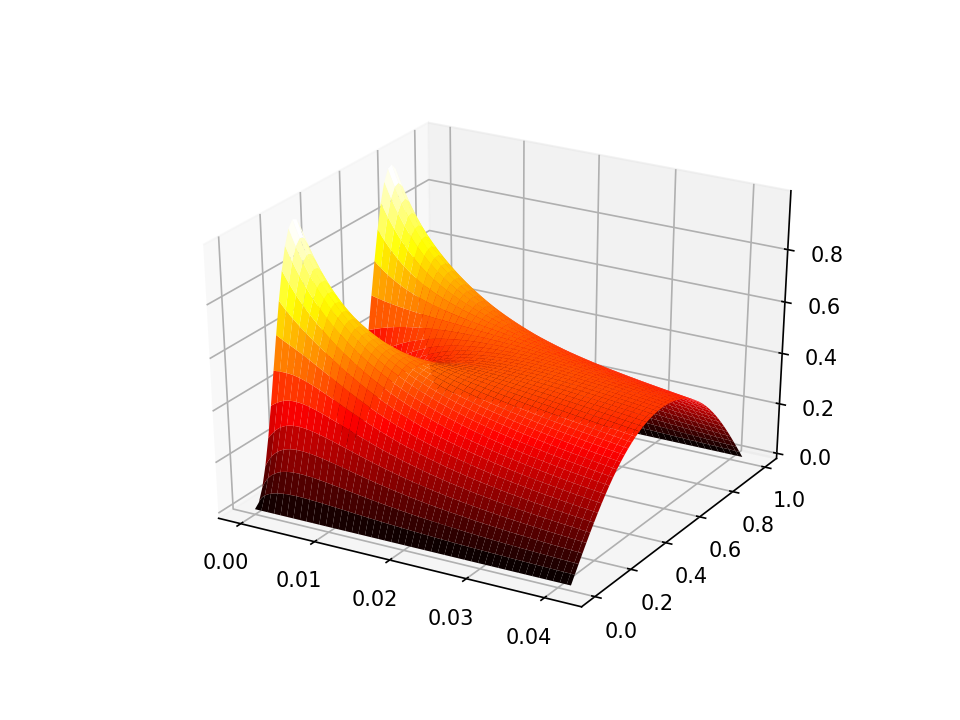

In [9]:
# show result
t = np.linspace(0.0, N_TIMES*k, (N_TIMES // N_STEPS) + 1)
X, T = np.meshgrid(x, t)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, evolution, cmap='hot')